In [182]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../utils')
import simulation as sim
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200

# Definir el plano del hospital


In [183]:

width = 53
height = 36
hospital = sim.Hospital(width, height)

for i in range(width):
    hospital.add_element(sim.Wall((i, 0)))
    hospital.add_element(sim.Wall((i, height - 1)))
for i in range(height):
    hospital.add_element(sim.Wall((0, i)))
    hospital.add_element(sim.Wall((width-1, i)))

for y in range(36):
    l = (4, 5, 13, 19, 25, 31)
    if y not in l:
        hospital.add_element(sim.Wall((9, y)))

for x in range(9):
    for y in (10, 16, 22, 28):
        hospital.add_element(sim.Wall((x, y)))

for y in range(9):
    if y not in (5, 6):
        hospital.add_element(sim.Wall((14, y)))

for y in range(9, 19):
    for x in (14, 23, 32, 41):
        hospital.add_element(sim.Wall((x, y)))

for x in range(14, 52):
    hospital.add_element(sim.Wall((x, 9)))

    if x not in (19, 28, 38, 46, 18, 27, 36, 45):
        hospital.add_element(sim.Wall((x, 18)))

for x in range(29, 52):
    hospital.add_element(sim.Wall((x, 23)))

for x in range(29, 40):
    if x not in (34, 35):
        hospital.add_element(sim.Wall((x, 28)))

for y in range(23, 28):
    hospital.add_element(sim.Wall((29, y)))
    hospital.add_element(sim.Wall((39, y)))

hospital.add_element(sim.Entry((width-9, height-1)))
hospital.add_element(sim.Exit((width-8, height-1)))
hospital.add_element(sim.ICU((20, 5)))

for y in (25, 31):
    hospital.add_element(sim.DoctorOffice(
        'general_practitioner', (3, y), (4, y)))
hospital.add_element(sim.DoctorOffice('psychiatrist', (3, 5), (4, 5)))
hospital.add_element(sim.DoctorOffice('surgeon', (18, 13), (18, 14)))
hospital.add_element(sim.DoctorOffice('pediatry', (27, 13), (27, 14)))
hospital.add_element(sim.DoctorOffice('gynecologist', (36, 13), (36, 14)))
hospital.add_element(sim.DoctorOffice('geriatrics', (45, 13), (45, 14)))

hospital.add_element(sim.Receptionist((45, 25), (45, 27)))


hospital.add_element(sim.Triage((32, 25)))
hospital.add_element(sim.Triage((34, 25)))
hospital.add_element(sim.Triage((36, 25)))

for x in range(14, 28, 2):
    for y in range(22, 31, 2):
        hospital.add_element(sim.Chair((x, y)))

hospital.plot().to_console()

############################################EX#######
#        #                                          #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    h h h h h h h                         #
#        #                                          #
##########    h h h h h h h  #####  ####            #
#        #                   #         #     P      #
#        #    h h h h h h h  #         #            #
#  DP                        #  T T T  #     R      #
#        #    h h h h h h h  #         #            #
#        #                   ########################
##########    h h h h h h h                         #
#        #                                          #
#        #                                          #
#                                                   #
#        #    ####  #######  ####### # ######  ######
#        #    #        #    

# Agrega los parámetros de simulación

In [184]:
original_probability = 0.099225
objects_probability = 0.0002

hospital.parameters = {
    'objects': {
        'chair': {
            'infect_probability': objects_probability,
            'cleaning_interval': sim.TimePeriod(1, 0, 0, 0),
            'radius': 0.1
        },
        'bed': {
            'infect_probability': original_probability,
            'radius': 0.0,
            'cleaning_interval': sim.TimePeriod(1, 0, 0, 0)
        }
    },
    'icu': {
        'beds': 90,
        'sleep_times': [
            {
                'time': sim.TimePeriod(2, 14, 24, 0),
                'probability': 0.004748328
            },
            {
                'time': sim.TimePeriod(3, 0, 0, 0),
                'probability': 0.088623115
            },
            {
                'time': sim.TimePeriod(3, 7, 12, 0),
                'probability': 0.017333166
            },
            {
                'time': sim.TimePeriod(3, 16, 48, 0),
                'probability': 0.032968386
            },
            {
                'time': sim.TimePeriod(4, 4, 48, 0),
                'probability': 0.013086353
            },
            {
                'time': sim.TimePeriod(4, 9, 36, 0),
                'probability': 0.100335789
            },
            {
                'time': sim.TimePeriod(4, 16, 48, 0),
                'probability': 0.066380434
            },
            {
                'time': sim.TimePeriod(4, 21, 36, 0),
                'probability': 0.000017555
            },
            {
                'time': sim.TimePeriod(6, 7, 12, 0),
                'probability': 0.007899849
            },
            {
                'time': sim.TimePeriod(6, 9, 36, 0),
                'probability': 0.100224175
            },
            {
                'time': sim.TimePeriod(6, 12, 0, 0),
                'probability': 0.084432757
            },
            {
                'time': sim.TimePeriod(6, 16, 48, 0),
                'probability': 0.117953925
            },
            {
                'time': sim.TimePeriod(7, 9, 36, 0),
                'probability': 0.053206605
            },
            {
                'time': sim.TimePeriod(8, 0, 0, 0),
                'probability': 0.026187069
            },
            {
                'time': sim.TimePeriod(9, 4, 48, 0),
                'probability': 0.122177398
            },
            {
                'time': sim.TimePeriod(9, 7, 12, 0),
                'probability': 0.033379033
            },
            {
                'time': sim.TimePeriod(10, 4, 48, 0),
                'probability': 0.037753818
            },
            {
                'time': sim.TimePeriod(29, 16, 48, 0),
                'probability': 0.094000000
            }
        ]
    },
    'reception': {
        'attention_time': sim.TimePeriod(0, 0, 1, 0)
    },
    'triage': {
        'icu': {
            'death_probability': 0.255,
            'probability': 0.070724557
        },
        'doctors_probabilities': [
            {
                'specialty': 'general_practitioner',
                'probability': 0.444567551
            },
            {
                'specialty': 'psychiatrist',
                'probability': 0.045610876
            },
            {
                'specialty': 'surgeon',
                'probability': 0.292939085
            },
            {
                'specialty': 'pediatry',
                'probability': 0.051335318
            },
            {
                'specialty': 'gynecologist',
                'probability': 0.075895021
            },
            {
                'specialty': 'geriatrics',
                'probability': 0.018927592
            },
        ],
        'levels': [
            {
                'level': 1,
                'probability': 0.0418719,
                'wait_time': sim.TimePeriod(0, 0, 0, 0)
            },
            {
                'level': 2,
                'probability': 0.0862069,
                'wait_time': sim.TimePeriod(0, 0, 15, 0)
            },
            {
                'level': 3,
                'probability': 0.6305419,
                'wait_time': sim.TimePeriod(0, 1, 0, 0)
            },
            {
                'level': 4,
                'probability': 0.2266010,
                'wait_time': sim.TimePeriod(0, 2, 0, 0)
            },
            {
                'level': 5,
                'probability': 0.0147783,
                'wait_time': sim.TimePeriod(0, 4, 0, 0)
            }
        ],
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'doctors': [
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'general_practitioner'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'psychiatrist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'surgeon'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'gynecologist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'geriatrics'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'pediatry'
        },
    ],
    'patient': {
        'walk_speed': 0.2,
        'infected_probability': np.array([0.3 for d in range(365)]),
        'influx': np.array([[random.randint(1, 10) for i in range(12)] for j in range(365)])
    },
    'human': {
        'infect_distance': 2.0,
        'contamination_probability': original_probability,
        'incubation_time': {
            'min': sim.TimePeriod(0, 14, 0, 0),
            'max': sim.TimePeriod(6, 0,  0, 0)
        },
        'infect_probability': original_probability
    },
    'personnel': {
        'immunity': 0.81
    },
    'environments': {
        'icu': {
            'infection_probability': 0.00135
        }
    }
}

# Define las propiedades de ejecución
(Parámetros relacionados al sistema o la ejecución y no al hospital)

In [185]:
props = sim.SimulationProperties(1, 1, seconds_per_tick=60, simulation_seed=random.randint(10000, 1000000))

In [186]:
run = sim.Simulation(props, hospital, tag='latest')
run.run(print_command=True)

/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec -np 1 /home/martin/Repositories/sti-hpc/build/sti-demo /home/martin/Repositories/sti-hpc/run/e26b7b628fa75fd567e6dfab52a8803b/config.props /home/martin/Repositories/sti-hpc/run/e26b7b628fa75fd567e6dfab52a8803b/model.props




# Analiza la performance un poco

In [187]:
import sys
sys.path.append('../utils')
import performance as perf

metrics = perf.Metrics(f"{run.folder}")

In [188]:
print(f"Simulation time: {metrics.total_time}")

Simulation time: 0 days 00:00:45.410320405


In [189]:
try:
    metrics.plot().pie()
except AttributeError:
    pass

In [190]:
try:
    metrics.plot().plot(0)
except AttributeError:
    pass

# Analiza el comportamiento de los agentes

In [191]:
import postprocess as pp
import pandas as pd

In [192]:
agents = pp.AgentsOutput(f"{run.folder}")

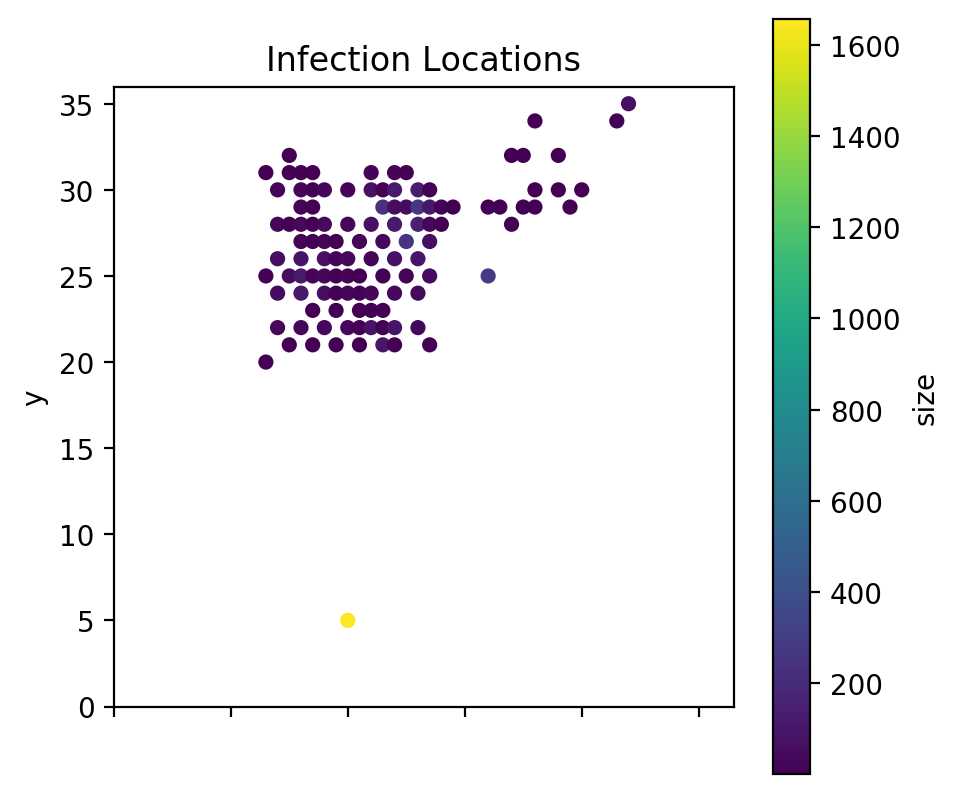

In [193]:
df = pd.concat([agents.patients, agents.staff])
oc = df[['infect_location.x', 'infect_location.y']]
oc = oc.rename(columns={'infect_location.x' : 'x', 'infect_location.y' : 'y'})
oc = oc[(oc['x'] != 0.0) | (oc['y'] != 0.0)]
oc = oc.groupby(['x', 'y'], as_index=False).size()
ax = oc.plot.scatter(x='x', y='y', c='size', colormap='viridis',
                     xlim=(0, hospital.dimensions[0]),
                     ylim=(0, hospital.dimensions[1]),
                     title='Infection Locations'
                     )
ax.set_aspect(hospital.dimensions[0] / hospital.dimensions[1])

In [194]:
dead = agents.patients[agents.patients.last_state ==  'MORGUE'].dropna(axis='columns')
dead['in_hospital'] = dead['exit_time'] - dead['entry_time']
dead['walking_time'] = dead['in_hospital'] - dead['sleep_time']
dead

repast_id     type        entry_time         exit_time last_state  \
0      291.0.1  patient   4 days 00:00:00   8 days 15:15:00     MORGUE   
1      153.0.1  patient   2 days 04:24:00   8 days 17:13:00     MORGUE   
2      285.0.1  patient   3 days 22:18:00   8 days 20:26:00     MORGUE   
3      184.0.1  patient   2 days 14:48:00   9 days 05:07:00     MORGUE   
4      339.0.1  patient   4 days 17:20:00   9 days 07:11:00     MORGUE   
..         ...      ...               ...               ...        ...   
405  23851.0.1  patient 358 days 10:27:00 361 days 12:51:00     MORGUE   
406  23795.0.1  patient 357 days 12:40:00 362 days 03:43:00     MORGUE   
407  23725.0.1  patient 356 days 12:20:00 363 days 04:07:00     MORGUE   
408  24000.0.1  patient 360 days 07:34:00 363 days 14:43:00     MORGUE   
409  23928.0.1  patient 359 days 10:27:00 364 days 00:14:00     MORGUE   

     process     infection_id infection_model infection_mode infection_stage  \
0          0    human.291.0.1           human         normal      incubating   
1          0    human.153.0.1           human         normal      incubating   
2          0    human.285.0.1           human         normal      incubating   
3          0    human.184.0.1           human         normal      incubating   
4          0    human.339.0.1           human         normal      incubating   
..       ...              ...             ...            ...             ...   
405        0  human.23851.0.1           human         normal      incubating   
406        0  human.23795.0.1           human         normal      incubating   
407        0  human.23725.0.1           human         normal      incubating   
408        0  human.24000.0.1           human         normal      incubating   
409        0  human.23928.0.1           human         normal      incubating   

       infection_time infected_by  infect_location.x  infect_location.y  \
0     8 days 14:52:00    bed.0.24               20.0                5.0   
1     8 days 17:10:00    bed.0.10               20.0                5.0   
2     8 days 19:56:00    bed.0.23               20.0                5.0   
3     9 days 04:50:00    bed.0.15               20.0                5.0   
4     9 days 07:05:00    bed.0.29               20.0                5.0   
..                ...         ...                ...                ...   
405 361 days 11:56:00    bed.0.25               20.0                5.0   
406 362 days 03:36:00    bed.0.45               20.0                5.0   
407 363 days 04:04:00     bed.0.6               20.0                5.0   
408 363 days 14:32:00    bed.0.19               20.0                5.0   
409 364 days 00:09:00    bed.0.22               20.0                5.0   

       incubation_end diagnosis_type      sleep_time survives     in_hospital  \
0    13 days 13:34:41            icu 4 days 09:36:00    False 4 days 15:15:00   
1    10 days 23:40:52            icu 6 days 12:00:00    False 6 days 12:49:00   
2    14 days 11:09:30            icu 4 days 16:48:00    False 4 days 22:08:00   
3    10 days 20:56:44            icu 6 days 12:00:00    False 6 days 14:19:00   
4    13 days 13:01:17            icu 4 days 09:36:00    False 4 days 13:51:00   
..                ...            ...             ...      ...             ...   
405 363 days 12:39:15            icu 3 days 00:00:00    False 3 days 02:24:00   
406 366 days 18:02:53            icu 4 days 09:36:00    False 4 days 15:03:00   
407 365 days 02:48:37            icu 6 days 09:36:00    False 6 days 15:47:00   
408 368 days 03:57:57            icu 3 days 00:00:00    False 3 days 07:09:00   
409 369 days 20:42:55            icu 4 days 09:36:00    False 4 days 13:47:00   

       walking_time  
0   0 days 05:39:00  
1   0 days 00:49:00  
2   0 days 05:20:00  
3   0 days 02:19:00  
4   0 days 04:15:00  
..              ...  
405 0 days 02:24:00  
406 0 days 05:27:00  
407 0 days 06:11:00  
408 0 days 07:09:00  
409 0 days 04:11:00  

[410 rows x 20 c

In [195]:
agents.patients['last_state'].value_counts()

WAIT_IN_DOCTOR    22561
LEAVE_ICU          1216
MORGUE              410
WAIT_CHAIR_1         44
                     32
NO_ATTENTION         30
WAIT_CHAIR_2         21
WAIT_CHAIR_3          2
Name: last_state, dtype: int64

In [196]:
import postprocess as pp
df = pd.concat([agents.patients, agents.staff])

In [197]:
df = df[df['infected_by'] != '']
itime = df['incubation_end'] - df['infection_time']

In [198]:
itime.describe()

count                         5851
mean     3 days 06:42:56.538711331
std      1 days 13:13:39.658723715
min                0 days 14:02:08
25%                1 days 22:50:16
50%                3 days 06:13:11
75%         4 days 14:54:11.500000
max                5 days 23:58:19
dtype: object

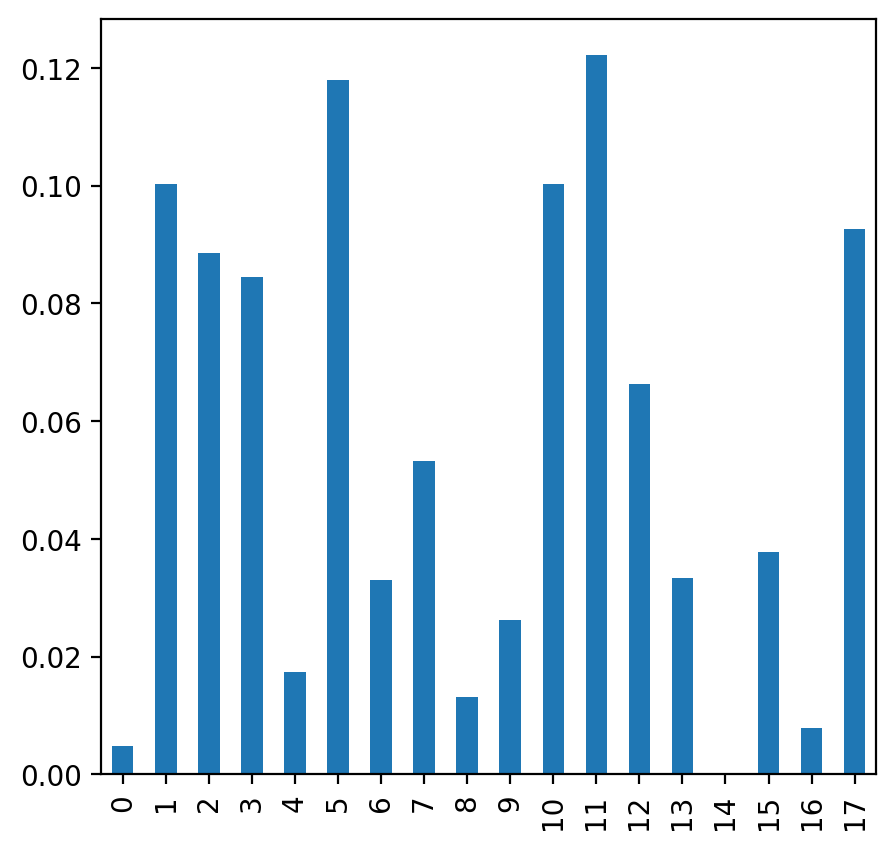

In [199]:
sleep_probs = [0.004748328, 0.100224175, 0.088623115, 0.084432757, 0.017333166, 0.117953925, 0.032968386, 0.053206605, 0.013086353, 0.026187069, 0.100335789, 0.122177398, 0.066380434, 0.033379033, 1.7555e-05, 0.037753818, 0.007899849, 0.092694777]
pd.Series(sleep_probs).plot(kind='bar')

In [200]:
df = agents.patients

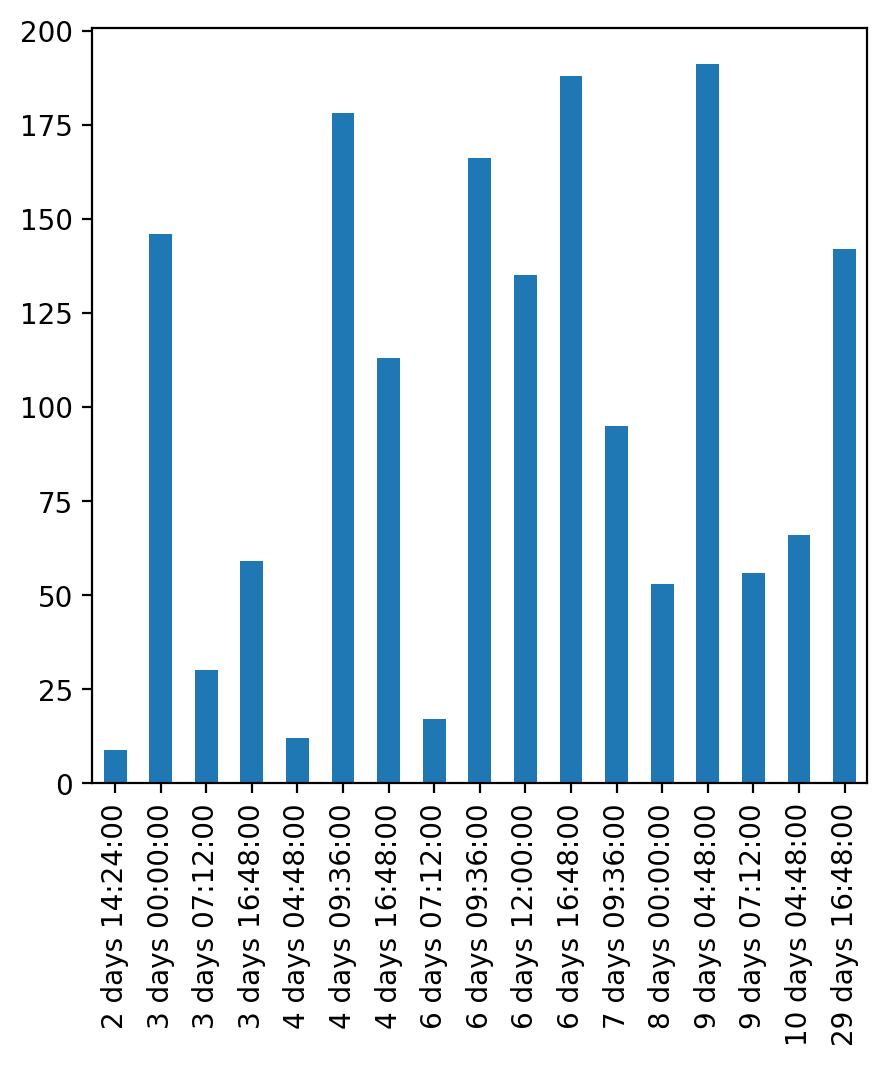

In [201]:
sleeps = df[~df['sleep_time'].isna()]['sleep_time'].value_counts().sort_index().plot(kind='bar')

Infected: 5851
Total: 24316
Top 5 offenders:
            18465
bed.0.13       52
bed.0.4        50
bed.0.5        49
bed.0.17       48
Name: infected_by, dtype: int64


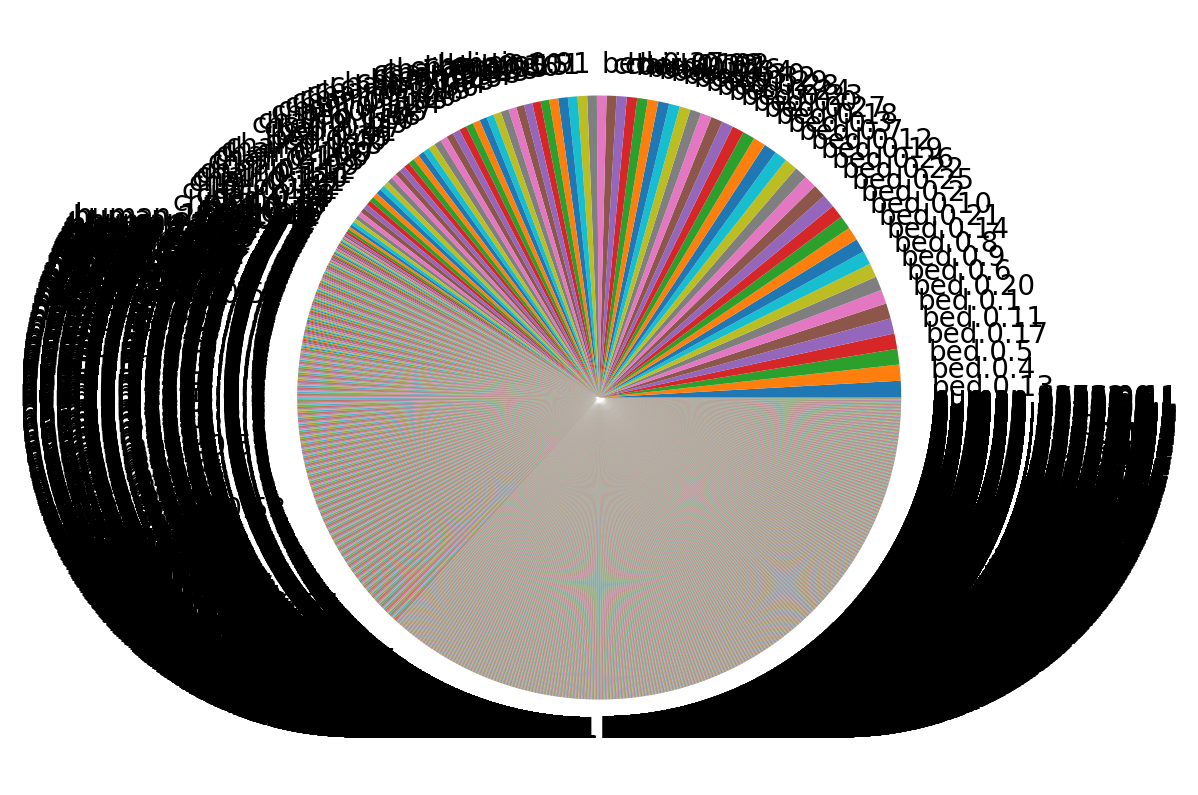

In [202]:
p = agents.patients
print(f"Infected: {p[p['infected_by'] != '']['infected_by'].count()}")
print(f"Total: {hospital.parameters['patient']['influx'].sum()}")
p[p['infected_by'] != '']['infected_by'].value_counts().plot.pie()
topn = 5
print(f"Top {topn} offenders:")
print(p['infected_by'].value_counts().sort_values(ascending=False).head(topn))

In [203]:
agents.dataframe[agents.dataframe['infection_id'] == 'human.5.0.0']

repast_id          type entry_time last_state infection_id infection_model  \
5     5.0.0  gynecologist        NaT        NaN  human.5.0.0           human   

  infection_mode infection_stage infection_time incubation_end  ...  \
5         immune         healthy         0 days         0 days  ...   

  infect_location.y  diagnosis_type  sleep_time survives doctor_specialty  \
5               0.0             NaN         NaT      NaN              NaN   

  triage_level attention_datetime_limit  process exit_time  infections  
5          NaN                      NaT        0       NaT         NaN  

[1 rows x 22 columns]